In [1]:
#Install the Quandl library and register for a Quandl account as described in the Exercise.
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm 
import os
import warnings 

warnings.filterwarnings("ignore") 

plt.style.use('fivethirtyeight')

In [2]:
quandl.ApiConfig.api_key = 'PBcEGS9842Auzww_Tq3v'

In [3]:
#Find a data set to work with and import it into your Jupyter notebook. Ensure that this data somehow connects to the broader research topic for your Achievement project. The best data set would be one that shares a common key with your main data set, such as a geographic component, so you can merge the data, but this could be difficult to find, so it’s not a requirement.
data = quandl.get('EURONEXT/GSP')

I chose to analyse the stock price movements of Groupe Sport Go, a sports retailer in Europe that mostly sells soccer eqipment, it was the most relevant dataset in Quandl that was available for free

In [4]:
data

,Open,High,Low,Last,Volume,Turnover
Date,,,,,,
2014-02-14,3.76,3.80,3.75,3.80,281.0,1057.76
2014-02-17,3.79,3.79,3.79,3.79,1.0,3.79
2014-02-18,3.79,3.79,3.79,3.79,1.0,3.79
2014-02-19,3.79,3.79,3.79,3.79,1.0,3.79
2014-02-20,3.79,3.99,3.75,3.99,2613.0,10121.57
...,...,...,...,...,...,...
2014-10-15,9.10,9.10,9.10,9.10,26.0,236.60
2014-10-16,9.09,9.10,8.69,9.10,30092.0,272624.93
2014-10-17,9.10,9.16,9.10,9.10,62727.0,570850.06


In [9]:
#3 Make a subset of your data set if necessary. Think about the historical domain of the series to decide if you need to (if there are irrelevant historical events in your data that would bias your analysis, for example). Also, make sure your set doesn’t include any forecasted data.
df = data[['Last']]

I've decided to make the subset consisting only of stock price at close as it seemed the most relevant

In [10]:
df

,Last
Date,
2014-02-14,3.80
2014-02-17,3.79
2014-02-18,3.79
2014-02-19,3.79
2014-02-20,3.99
...,...
2014-10-15,9.10
2014-10-16,9.10
2014-10-17,9.10


In [19]:
df2 = df.reset_index()

In [20]:
df2.head()

,Date,Last
0,2014-02-14,3.80
1,2014-02-17,3.79
2,2014-02-18,3.79
3,2014-02-19,3.79
4,2014-02-20,3.99


In [21]:
df2['datetime'] = pd.to_datetime(df2['Date'])
df2 = df2.set_index('datetime')
df2.drop(['Date'], axis=1, inplace=True) 
df2.head()

,Last
datetime,
2014-02-14,3.80
2014-02-17,3.79
2014-02-18,3.79
2014-02-19,3.79
2014-02-20,3.99


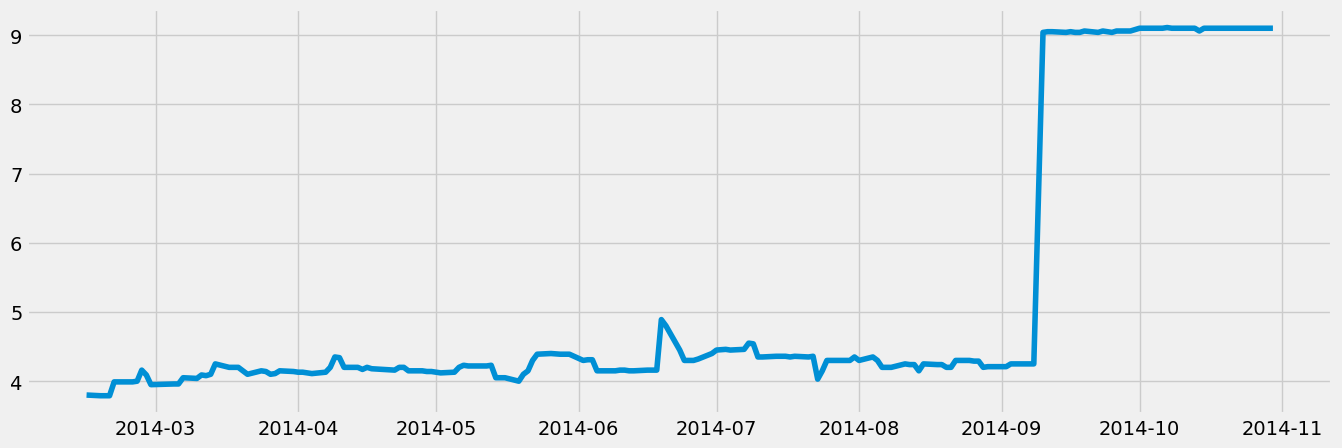

In [32]:
#4 Create a line chart of your data.
plt.figure(figsize=(15,5), dpi=100) 

plt.plot(df2)

In [40]:
#5 Decompose the data’s components.
decomposition = sm.tsa.seasonal_decompose(df2, model='additive', freq = 52)

In [42]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 7

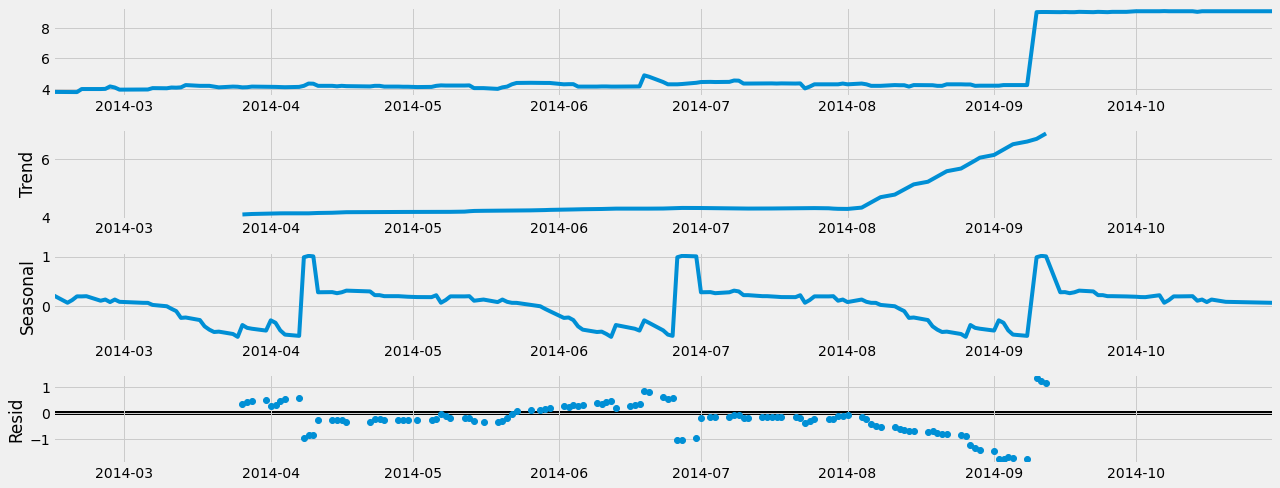

In [43]:
decomposition.plot()
plt.show()

The data shows some seasonality and there is an upward trend starting in August 2014

In [55]:
#6 Conduct a Dickey-Fuller test to check for stationarity.
from statsmodels.tsa.stattools import adfuller
def dickey_fuller(timeseries): 
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)
dickey_fuller(df2['Last'])

Dickey-Fuller Stationarity test:
Test Statistic                  -0.510227
p-value                          0.890005
Number of Lags Used              0.000000
Number of Observations Used    167.000000
Critical Value (1%)             -3.470126
Critical Value (5%)             -2.879008
Critical Value (10%)            -2.576083
dtype: float64


Can't rejet the null hypothesis as the Test Statistic is larger than the Critical Value at 5%

In [ ]:
#7 If your data isn’t stationary, conduct a round of differencing on it and repeat step 6.

In [56]:
data_diff = df2 - df2.shift(1)

In [57]:
data_diff.dropna(inplace = True)

In [58]:
data_diff.head()

,Last
datetime,
2014-02-17,-0.01
2014-02-18,0.00
2014-02-19,0.00
2014-02-20,0.20
2014-02-21,0.00


In [59]:
data_diff.columns

Index(['Last'], dtype='object')

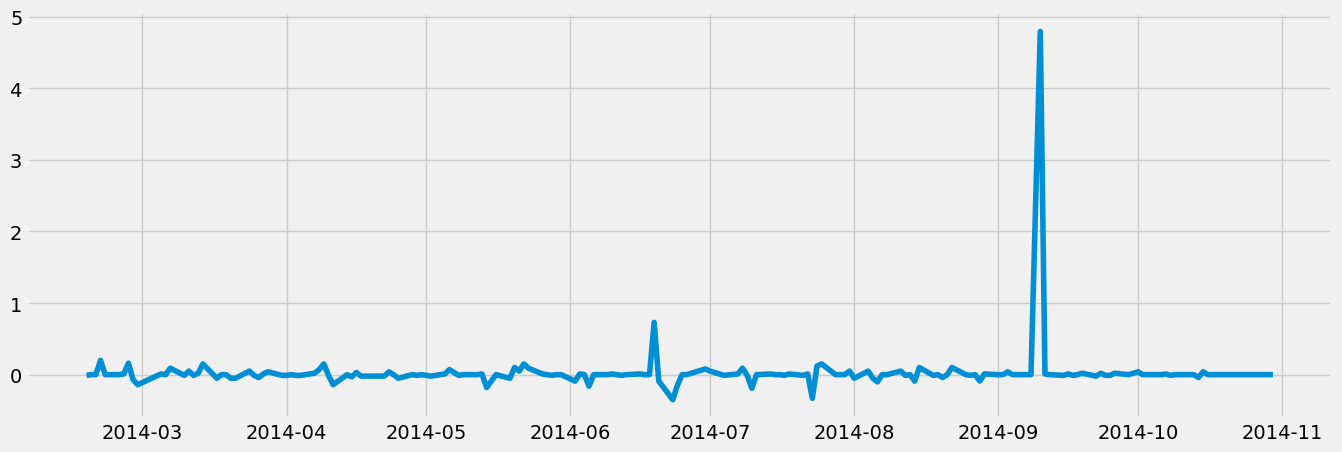

In [60]:
plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [61]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                -1.286766e+01
p-value                        4.955665e-24
Number of Lags Used            0.000000e+00
Number of Observations Used    1.660000e+02
Critical Value (1%)           -3.470370e+00
Critical Value (5%)           -2.879114e+00
Critical Value (10%)          -2.576139e+00
dtype: float64


The Test Statistic is now smaller than the Critical Value at 5% confdence, so we can reject the null hypothesis and the data is now stationary

In [ ]:
#9 Check your data’s autocorrelations

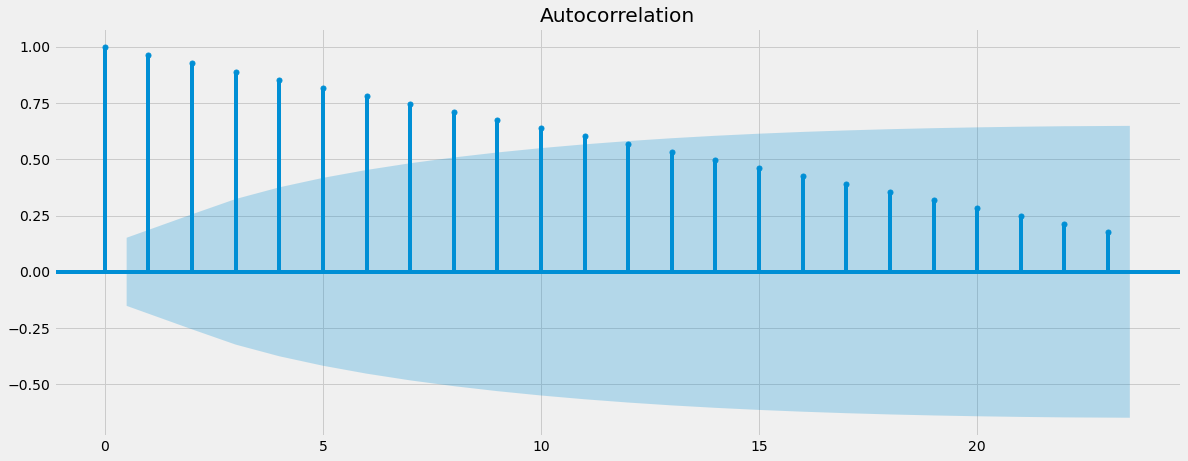

In [63]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(df2)
plt.show()

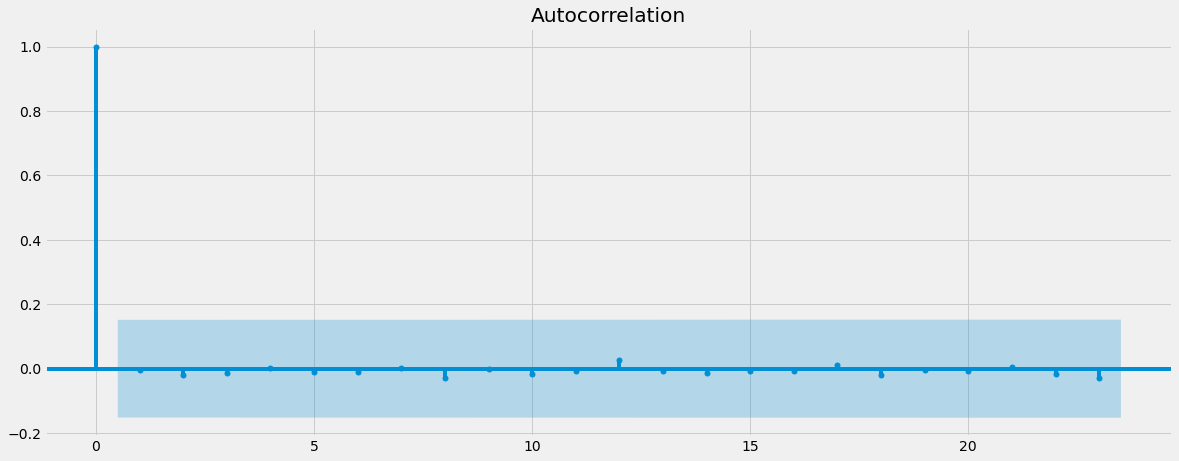

In [64]:
plot_acf(data_diff)
plt.show()